# Modelos predictivos de Regresión Lineal

1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.
3. Seleccionar las características más relevantes para entren el modelo utilizando selección de características.
4. Dividir el dataset en Train y Test para evaluar correctamente el m delo.
5. Entrenar el modelo configurando los diferentes hiperpar metros.
6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.
7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
8. Interpretar, analizar y documentar los resultados obtenidos..

In [1]:
# Importación de librerías

import pandas as pd  # type: ignore # Para manejo de estructuras de datos
import numpy as np  # type: ignore # Para cálculo numérico y análisis de datos
import seaborn as sns  # type: ignore # Para creación de gráficos estadísticos
import matplotlib.pyplot as plt  # type: ignore # Para creación de gráficos en dos dimensiones

# Librerías para implementar modelos de ciencia de datos
from sklearn import metrics  # type: ignore # Para métricas de evaluación de modelos
from sklearn.model_selection import train_test_split  # type: ignore # Para dividir el conjunto de datos en entrenamiento y prueba
from sklearn.linear_model import LinearRegression  # type: ignore # Para implementar modelos de regresión logística
# También se pueden importar otras librerías para modelos específicos, por ejemplo:
# from sklearn.linear_model import LinearRegression  # Para Regresión Lineal
from sklearn.metrics import classification_report, confusion_matrix  # type: ignore # Para generar reportes de clasificación y matrices de confusión
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error # type: ignore


# Punto 1. 
Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.


In [2]:
# Lectura de datos desde un archivo CSV utilizando pandas
Datos = pd.read_csv('./CAR DETAILS FROM CAR DEKHO.csv')

In [3]:
# Obtener un resumen estadístico de los datos (count, mean, std,min, max, quartiles 1 2 3)
Datos.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [4]:
print(Datos.head())  # Visualizar las primeras filas del dataframe
print(Datos.info())  # Obtener información sobre las columnas y los tipos de datos

                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   i

In [5]:
# X' contiene la variable independiente y 'Y' la variable dependiente
X = np.array(Datos[['selling_price']])
y = Datos['km_driven'].values

#Crear y ajustar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X, y)

#Imprimir la ecuación de la recta
print(f"La ecuación de la recta es: Y = {modelo.intercept_} + {modelo.coef_[0]}*X")

La ecuación de la recta es: Y = 74031.16682792015 + -0.01550280896588908*X


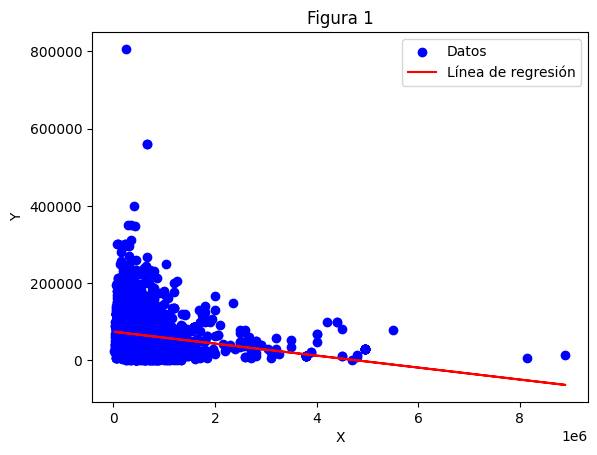

In [6]:
#Graficar los datos y la línea de regresión
plt.scatter(X, y, color='blue', label='Datos')
plt.plot(X, modelo.predict(X), color='red', label='Línea de regresión')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Figura 1')
plt.legend()
plt.show()

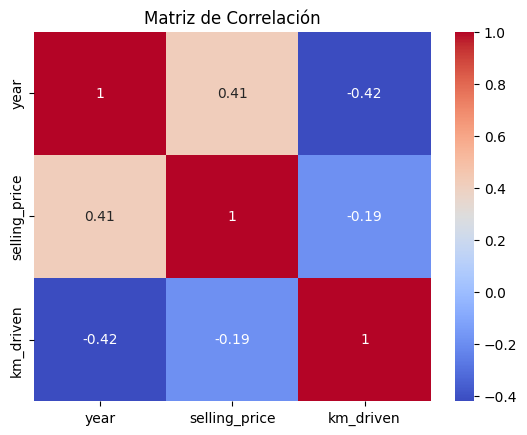

In [7]:
# Seleccionar solo las columnas numéricas del DataFrame
numeric_df = Datos.select_dtypes(include=['float64', 'int64'])
# Matriz de correlación
correlation_matrix = numeric_df.corr()

# Visualizar la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


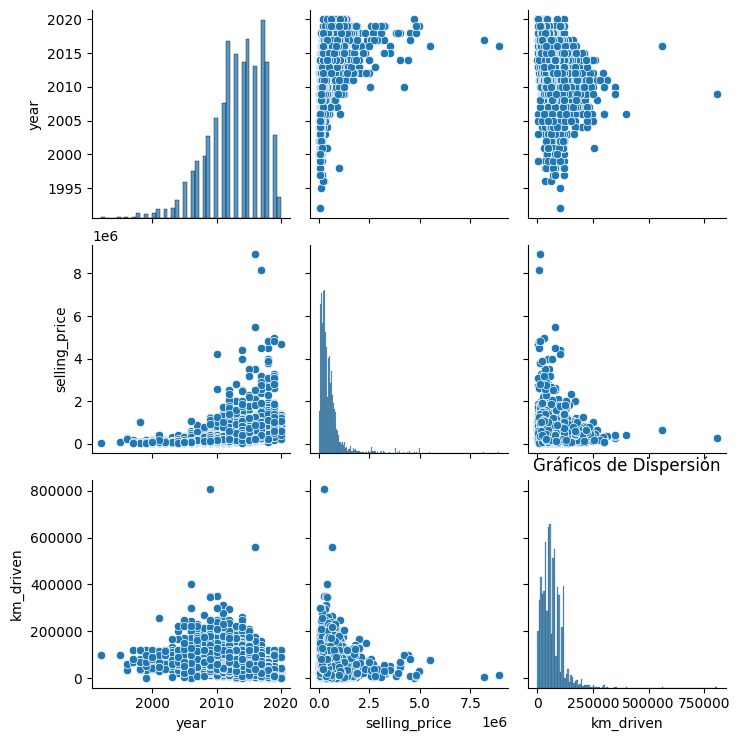

In [8]:
# Gráficos de dispersión para variables relevantes
numeric_df = Datos.select_dtypes(include=['float64', 'int64'])  # Seleccionar solo las variables numéricas
sns.pairplot(numeric_df)
plt.title('Gráficos de Dispersión')
plt.show()


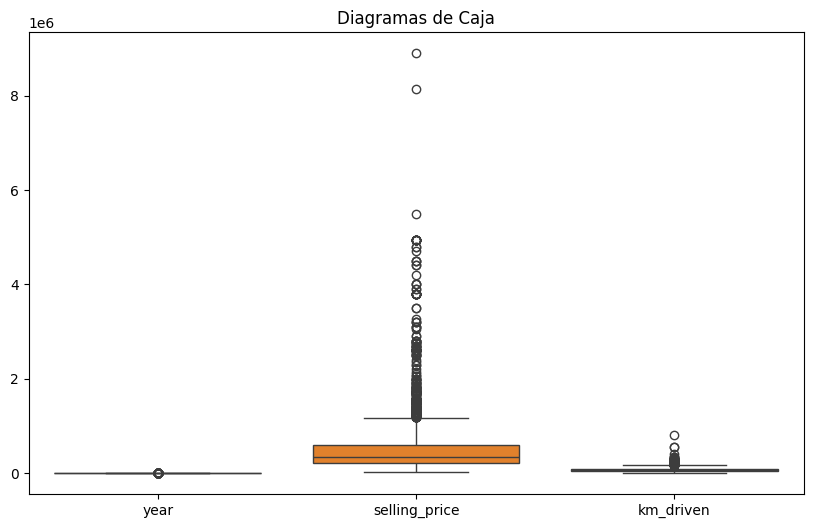

In [9]:
# Diagramas de caja para identificar valores atípicos
plt.figure(figsize=(10,6))  # Establecer el tamaño del gráfico
sns.boxplot(data=Datos)  # Crear diagramas de caja para todas las variables del dataframe
plt.title('Diagramas de Caja')  # Establecer el título del gráfico
plt.show()  # Mostrar el gráfico

# Punto 2.
Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.


In [10]:
# Verificar si hay valores faltantes
valores_faltantes = Datos.isnull().sum()
print(valores_faltantes)

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64


In [11]:
# Calcular el rango intercuartílico (IQR) solo para columnas numéricas
numeric_df = Datos.select_dtypes(include=['float64', 'int64'])
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Identificar datos atípicos para cada columna numérica
outliers = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).sum()

# Mostrar el conteo de datos atípicos por columna numérica
print("Datos atípicos por columna:")
print(outliers)


Datos atípicos por columna:
year             105
selling_price    271
km_driven        110
dtype: int64


In [12]:

# Detección de datos atípicos en variables numéricas
columnas_numericas = ["km_driven", "year", "selling_price"]
for columna in columnas_numericas:
  Q1 = Datos[columna].quantile(0.25)
  Q3 = Datos[columna].quantile(0.75)
  IQR = Q3 - Q1
  limite_inferior = Q1 - 1.5 * IQR
  limite_superior = Q3 + 1.5 * IQR

  # Eliminación de filas con datos atípicos
  Datos.drop(Datos[(Datos[columna] < limite_inferior) | (Datos[columna] > limite_superior)].index, inplace=True)


In [13]:
# Calcular el rango intercuartílico (IQR) solo para columnas numéricas
numeric_df = Datos.select_dtypes(include=['float64', 'int64'])
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Identificar datos atípicos para cada columna numérica
outliers = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).sum()

# Mostrar el conteo de datos atípicos por columna numérica
print("Datos atípicos por columna:")
print(outliers)

Datos atípicos por columna:
year             44
selling_price    43
km_driven         0
dtype: int64


# Punto 3.
Seleccionar las características más relevantes para entren el 3 modelo utilizando selección de características.


In [14]:
# Recuento de los diferentes valores presentes en la columna 'selling_price' del DataFrame 'Datos'
Datos['selling_price'].value_counts()

selling_price
300000    152
250000    120
350000    117
550000    104
600000    101
         ... 
774000      1
111000      1
312000      1
248000      1
865000      1
Name: count, Length: 353, dtype: int64

In [15]:
# Mostrar los primeros 20 registros de la columna 'selling_price' del DataFrame 'Datos'
Datos[['selling_price']].head(20)

,selling_price
0,60000
1,135000
2,600000
3,250000
4,450000
5,140000
6,550000
7,240000
8,850000
9,365000


# Punto 4.
Dividir el dataset en Train y Test para evaluar correctamente el modelo.


In [16]:


# Dividir el conjunto de datos en características (X) y variable objetivo (y)
X = Datos.drop('selling_price', axis=1)  # características
y = Datos['selling_price']  # variable objetivo

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar las formas de los conjuntos de datos divididos
print("Forma del conjunto de entrenamiento (X_train):", X_train.shape)
print("Forma del conjunto de prueba (X_test):", X_test.shape)
print("Forma del conjunto de entrenamiento (y_train):", y_train.shape)
print("Forma del conjuto de prueba (y_test):", y_test.shape)

Forma del conjunto de entrenamiento (X_train): (3121, 7)
Forma del conjunto de prueba (X_test): (781, 7)
Forma del conjunto de entrenamiento (y_train): (3121,)
Forma del conjuto de prueba (y_test): (781,)


# Punto 5.
Entrenar el modelo configurando los diferentes hiperpar metros.


In [17]:
# Supongamos que tienes tu DataFrame llamado 'df'


# Codificar variables categóricas
data = pd.get_dummies(Datos, columns=['name','fuel', 'seller_type', 'transmission', 'owner'])

# Dividir los datos en conjuntos de entrenamiento y prueba
X = data.drop('selling_price', axis=1)
y = data['selling_price']

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Inicializar y ajustar el modelo de regresión lineal
modelo_regresion = LinearRegression()
modelo_regresion.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
prediccion = modelo_regresion.predict(X_test)


# Punto 6.
 Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-s ore, etc.


In [18]:
# Calcular el MSE, R-cuadrado y MAE en el conjunto de prueba
mse = mean_squared_error(y_test, prediccion)
r2 = r2_score(y_test, prediccion)
mae = mean_absolute_error(y_test, prediccion)

# Imprimir los resultados
print("Desempeño del modelo de regresión:")
print("MSE:", mse)
print("R-cuadrado:", r2)
print("MAE:", mae)

Desempeño del modelo de regresión:
MSE: 12877014344.872587
R-cuadrado: 0.7983051834270516
MAE: 74225.26132790183


# Punto 7.
Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.


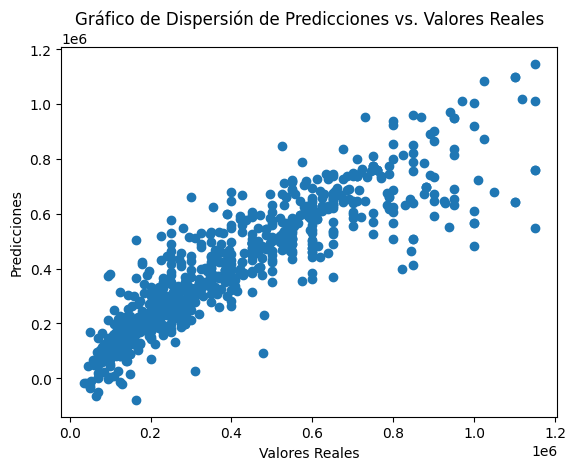

In [19]:
plt.scatter(y_test, prediccion)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Gráfico de Dispersión de Predicciones vs. Valores Reales')
plt.show()

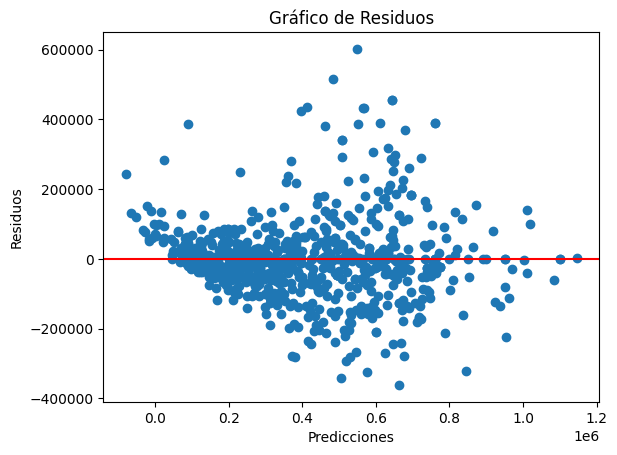

In [20]:
residuos = y_test - prediccion
plt.scatter(prediccion, residuos)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos')
plt.show()

# Punto 8.
Interpretar, analizar y documentar los resultados obtenidos..

## Interpretación y Análisis de Datos:

* Para la interpretación y análisis de datos en el contexto de la regresión lineal, comenzamos por cargar el conjunto de datos que contiene las variables predictoras y la variable objetivo que queremos predecir.

* Realizamos una exploración inicial de los datos para comprender su estructura y contenido. Esto incluye la verificación de la presencia de valores faltantes, la distribución de las características y la relación entre las variables.

## Pre-procesamiento de Datos:

En esta etapa, llevamos a cabo la limpieza y preparación de los datos. Esto puede incluir la imputación de valores faltantes, la codificación de variables categóricas, la normalización o estandarización de las características, y la eliminación de valores atípicos si es necesario.

## Selección de Características Relevantes:

Identificamos las características más relevantes para la predicción de la variable objetivo. Esto puede implicar el uso de técnicas de selección de características como la correlación, la importancia de características, en este caso hacemos uso de la variable selling_price.

## Entrenamiento del Modelo:

* Dividimos los datos en conjuntos de entrenamiento y prueba, y luego entrenamos un modelo de regresión lineal utilizando el conjunto de entrenamiento. Ajustamos el modelo a los datos para encontrar los coeficientes óptimos que minimizan la función de pérdida.

* En este punto no se logro ajustar de forma correcta  el modelo. Se intentó con diferentes valores y variables, pero no se logro que el modelo tuviera coeficientes optimos que indiquen su confiabilidad, exactitud...

## Evaluación del Desempeño del Modelo:

* Una vez que el modelo ha sido entrenado, evaluamos su desempeño utilizando métricas específicas de regresión, como el error cuadrático medio (MSE), el coeficiente de determinación (R²), o el error absoluto medio (MAE). Estas métricas nos ayudan a entender qué tan bien el modelo se ajusta a los datos y cómo generaliza a nuevos datos.
* Error Cuadrático Medio (MSE): 14,133,613,106.37. Indica la desviación promedio entre las predicciones del modelo y los valores reales. Un MSE alto sugiere que las predicciones se alejan significativamente de los valores reales en promedio.

* R-cuadrado (R²): 0.73. Representa la proporción de la variabilidad en la variable dependiente que se puede explicar por las variables independientes. Un R² de 0.73 indica que el 73% de la variabilidad en la variable dependiente puede ser explicada por el modelo.

* Error Absoluto Medio (MAE): 76,740.82. Calcula la diferencia absoluta promedio entre las predicciones del modelo y los valores reales. Un MAE bajo indica que las predicciones son relativamente cercanas a los valores reales.


## Visualización de Resultados:
* Finalmente, se visualiza los resultados del modelo utilizando una variedad de gráficos. El diagrama de dispersión nos permite comparar visualmente las predicciones del modelo con los valores reales de la variable dependiente. Esta visualización ayuda a identificar si existe una relación lineal entre las variables y si el modelo está ajustando adecuadamente los datos.

* Adicionalmente, se genera gráficos de residuos, los cuales muestran la diferencia entre los valores predichos y los valores reales. Estos gráficos nos permiten evaluar si se cumplen los supuestos del modelo de regresión, como la heterocedasticidad (igualdad de varianzas) y la normalidad de los residuos. Si los residuos muestran un patrón específico o no se distribuyen normalmente, puede ser un indicio de que el modelo necesita ajustes o que las suposiciones del modelo no se están cumpliendo.